# `YourCabs.com`

# Overall Analysis and Implementation Plan
- `ID` - Set as Row Index - All values unique
- `User_ID` - Drop - PII - mobile number - we do not use Personal Information Identifiers in machine learning features
- `vehicle_model_id` - Drop, since >70% of values are 12

- Divide the data into 3 datasets based on travel_type_id, since for different travel types different features are applicable

- After dividing the data into 3 subsets, 3 different machine learning models are to be created:
1. ML Model 1 for travel_type_1
2. ML Model 2 for travel type_2
3. ML Model 3 for travel_type_3

# Below is the column-wise analysis for each subset regarding if they need to be dropped, kept or transformed.

## For travel_type_id = 1

- package_id - drop - all null values
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volume i.e. Zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - use mode to impute the null values
- to_city_id - use mode to impute the null values
- Make a column for inter-city routes - from_city_id -> to_city_id
- city_routes - transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
- to_city_id, from_city_id, routes, cancellation_perc - drop
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat,from_long,to_lat,to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id


## For travel_type_id = 2

- package_id - drop - all null values
- travel_type_id - drop - all same values
- from_area_id,to_area_id - Make a column for intra-city routes - from_area_id -> to_area_id - transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- from_lat,from_long,to_lat,to_long - impute missing using median
- from these lat/long - calculate the distance in KM (geopy) and then drop all four lat/long col


## For travel_type_id = 3

- package_id - keep
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volume i.e. Zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat,from_long,to_lat,to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id


## Preprocess these subsets if required such as label encoding etc.


## Machine Learning - Classification
- Decision Tree
- Random Forest
- Naive Bayes Classifier

## Compare the performance and then select the BEST model for each of the three datasets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('YourCabs.csv')

In [3]:
df.sample(5)

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6058,139933,16461,12,2,NaN,413.0,571.0,NaN,NaN,03-03-2013 16:30,0,0,03-03-2013 15:06,12.921710,77.590170,12.951850,77.696420,0
19553,156553,34735,87,2,NaN,1078.0,1333.0,NaN,NaN,6/25/2013 7:30,0,0,6/23/2013 20:07,12.992123,77.581667,12.895675,77.602293,0
35424,176089,2494,85,2,NaN,393.0,559.0,15.0,NaN,9/29/2013 12:30,1,0,9/28/2013 18:21,13.199560,77.706880,12.971730,77.598290,0
21916,159497,12757,12,2,NaN,1096.0,97.0,NaN,NaN,07-09-2013 15:00,0,0,07-09-2013 12:13,12.965190,77.719320,12.979430,77.661250,0
10172,144920,28598,12,2,NaN,344.0,105.0,NaN,NaN,4/16/2013 19:45,0,0,4/16/2013 18:08,12.947880,77.670920,13.017660,77.645030,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

## Set id as Index

In [5]:
df.set_index('id', inplace=True)

In [6]:
df.sample(5)

,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,,,
155168,34028,12,2,NaN,149.0,393.0,NaN,NaN,6/15/2013 18:00,0,0,6/15/2013 14:29,12.930220,77.560390,13.19956,77.70688,0
181317,46373,12,2,NaN,393.0,217.0,15.0,NaN,10/28/2013 1:00,0,0,10/27/2013 11:58,13.199560,77.706880,13.00110,77.62350,0
149613,868,12,2,NaN,1010.0,353.0,NaN,NaN,5/17/2013 9:30,0,0,5/17/2013 8:57,12.966910,77.749350,13.03241,77.59914,0
173496,42687,12,2,NaN,977.0,393.0,15.0,NaN,9/16/2013 6:00,0,0,9/14/2013 17:02,12.969933,77.533286,13.19956,77.70688,0
145134,28708,12,2,NaN,455.0,168.0,NaN,NaN,4/19/2013 13:00,0,0,4/18/2013 16:28,12.999874,77.678120,12.99313,77.59828,0


## Dropping Duplicates

In [7]:
df.duplicated().sum()

41

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print(df.duplicated().sum())

0


In [10]:
# pd.set_option('display.max_rows()',None)
df['vehicle_model_id'].value_counts()

vehicle_model_id
12    31822
85     2407
89     2391
65     1911
28     1701
24     1494
87      563
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: count, dtype: int64

## Dropping user_id and vehicle_model_id

In [11]:
df.drop(columns=['user_id', 'vehicle_model_id'], axis=1, inplace=True)

In [12]:
df.sample(2)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
174331,2,NaN,1399.0,352.0,15.0,NaN,9/18/2013 23:45,1,0,9/18/2013 22:09,12.944965,77.683676,13.03369,77.62821,0
162015,3,2.0,1281.0,NaN,NaN,NaN,8/18/2013 2:45,1,0,7/22/2013 7:55,12.934634,77.611283,NaN,NaN,0


## Checking datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43390 entries, 132512 to 185941
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43390 non-null  int64  
 1   package_id           7541 non-null   float64
 2   from_area_id         43302 non-null  float64
 3   to_area_id           34261 non-null  float64
 4   from_city_id         16325 non-null  float64
 5   to_city_id           1588 non-null   float64
 6   from_date            43390 non-null  object 
 7   online_booking       43390 non-null  int64  
 8   mobile_site_booking  43390 non-null  int64  
 9   booking_created      43390 non-null  object 
 10  from_lat             43297 non-null  float64
 11  from_long            43297 non-null  float64
 12  to_lat               34261 non-null  float64
 13  to_long              34261 non-null  float64
 14  Car_Cancellation     43390 non-null  int64  
dtypes: float64(9), int64(4), object(2)


In [14]:
# df['package_id'] = df['package_id'].astype('int')

# df['from_area_id'] = df['from_area_id'].astype('object')
# df['to_area_id'] = df['to_area_id'].astype('object')
# df['from_city_id'] = df['from_city_id'].astype('object')
# df['to_city_id'] = df['to_city_id'].astype('object')

# df['from_date'] = pd.to_datetime(df['from_date'],formate='mixed')
# df['booking_created'] = pd.to_datetime(df['booking_created'],formate='mixed')

In [15]:
df['travel_type_id'].value_counts()

travel_type_id
2    34260
3     7541
1     1589
Name: count, dtype: int64

## Dividing the datasets into 3 based on travel_type_id

In [16]:
tt1 = df.loc[df.travel_type_id==1]
tt2 = df.loc[df.travel_type_id==2]
tt3 = df.loc[df.travel_type_id==3]

In [17]:
tt1.sample(3)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
167046,1,NaN,1056.0,NaN,15.0,55.0,8/15/2013 7:15,0,0,8/15/2013 6:21,12.919199,77.60931,NaN,NaN,0
146346,1,NaN,393.0,NaN,15.0,58.0,4/27/2013 15:00,0,0,4/27/2013 9:40,13.199560,77.70688,NaN,NaN,0
178639,1,NaN,142.0,NaN,15.0,32.0,10/13/2013 9:00,0,0,10-12-2013 09:23,12.912810,77.60923,NaN,NaN,0


In [18]:
tt2.sample(3)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
176736,2,NaN,458.0,393.0,15.0,NaN,10-02-2013 10:45,1,0,10-01-2013 20:49,13.000370,77.727460,13.19956,77.70688,0
184969,2,NaN,393.0,949.0,15.0,NaN,11/17/2013 16:00,1,0,11/17/2013 10:51,13.199560,77.706880,12.98275,77.61582,0
167369,2,NaN,293.0,1384.0,15.0,NaN,8/16/2013 20:45,1,0,8/16/2013 17:48,12.849482,77.663187,13.02853,77.54625,0


In [19]:
tt3.sample(3)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
151662,3,1.0,822.0,NaN,NaN,NaN,5/29/2013 8:30,0,0,5/29/2013 7:12,13.01024,77.580560,NaN,NaN,0
169662,3,3.0,1054.0,NaN,NaN,NaN,8/28/2013 11:00,0,0,8/28/2013 10:37,12.90184,77.581587,NaN,NaN,0
135801,3,1.0,571.0,NaN,NaN,NaN,1/29/2013 17:15,0,0,1/29/2013 16:37,12.95185,77.696420,NaN,NaN,0


# Preprocessing `tt1`

In [20]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       1589 non-null   int64  
 1   package_id           0 non-null      float64
 2   from_area_id         1501 non-null   float64
 3   to_area_id           1 non-null      float64
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  to_lat               1 non-null      float64
 13  to_long              1 non-null      float64
 14  Car_Cancellation     1589 non-null   int64  
dtypes: float64(9), int64(4), object(2)
m

In [21]:
tt1.drop(columns=[ 'package_id', 'travel_type_id', 'to_area_id','from_lat','from_long', 'to_lat', 'to_long'], axis=1, inplace=True)

In [22]:
tt1.sample(3)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
id,,,,,,,,
160504,115.0,15.0,32.0,7/14/2013 10:30,0,0,7/14/2013 8:45,0
159591,572.0,15.0,161.0,7/19/2013 15:30,0,0,07-09-2013 20:32,0
161178,NaN,15.0,32.0,7/18/2013 10:00,0,0,7/18/2013 1:06,0


In [23]:
tt1['from_area_id'] = tt1['from_area_id'].astype('object')
tt1['from_city_id'] = tt1['from_city_id'].astype('object')
tt1['to_city_id'] = tt1['to_city_id'].astype('object')

In [24]:
tt1['from_date'] = pd.to_datetime(tt1['from_date'],format='mixed')
tt1['booking_created'] = pd.to_datetime(tt1['booking_created'],format='mixed')

In [25]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   object        
 1   from_city_id         1393 non-null   object        
 2   to_city_id           1588 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 111.7+ KB


## Missing Value Treatment

In [26]:
print((tt1.isnull().sum() / len(tt1) * 100).round(2))

from_area_id            5.54
from_city_id           12.33
to_city_id              0.06
from_date               0.00
online_booking          0.00
mobile_site_booking     0.00
booking_created         0.00
Car_Cancellation        0.00
dtype: float64


In [27]:
tt1.describe(include=object)

,from_area_id,from_city_id,to_city_id
count,1501.0,1393.0,1588.0
unique,297.0,3.0,116.0
top,393.0,15.0,32.0
freq,257.0,1281.0,475.0


In [28]:
tt1.from_area_id.fillna(tt1['from_area_id'].mode()[0], inplace=True)
tt1.from_city_id.fillna(tt1.from_city_id.mode()[0], inplace=True)
tt1.to_city_id.fillna(tt1.to_city_id.mode()[0], inplace=True)
# tt1.from_area_id.fillna('393.0',inplace=True)
# tt1.from_city_id.fillna('15.0',inplace=True)
# tt1.to_city_id.fillna('32.0',inplace=True)

In [29]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1589 non-null   float64       
 1   from_city_id         1589 non-null   float64       
 2   to_city_id           1589 non-null   float64       
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 111.7 KB


## Checking duplicates

In [30]:
print(tt1.duplicated().sum())

0


## Transform & drop `from_area_id`

In [31]:
from_area_id_cancel_perc = tt1[['from_area_id', 'Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
tt1['from_area_cancel_perc'] = tt1.from_area_id.map(from_area_id_cancel_perc)
tt1.head(5)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_perc
id,,,,,,,,,
132519,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0.020408
132531,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0.000000
132539,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0.000000
132697,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0.000000
132760,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0.000000


In [32]:
tt1.loc[tt1.from_area_cancel_perc>0, 'from_area_cancel_perc']

id
132519    0.020408
132907    0.008696
132911    0.076923
133098    0.008696
133312    0.166667
            ...   
185701    0.020408
185732    0.008696
185738    0.020408
185843    0.008696
185899    0.008696
Name: from_area_cancel_perc, Length: 610, dtype: float64

In [33]:
tt1.loc[tt1.from_area_cancel_perc>0, 'from_area_cancel_perc'].describe()

count    610.000000
mean       0.034426
std        0.066119
min        0.008696
25%        0.008696
50%        0.008696
75%        0.021277
max        0.500000
Name: from_area_cancel_perc, dtype: float64

In [34]:
tt1.loc[tt1.from_area_cancel_perc>0, 'from_area_cancel_perc'].quantile(0.33)

0.008695652173913044

In [35]:
print(tt1.loc[tt1.from_area_cancel_perc>0, 'from_area_cancel_perc'].quantile(0.66))

0.02040816326530612


In [36]:
tt1['from_area_cancel_vol'] = np.where(tt1.from_area_cancel_perc > 0.0204081, "High", 
                                      np.where(tt1.from_area_cancel_perc == 0, "Zero",
                                      np.where(tt1.from_area_cancel_perc < 0.008695, "Low","Medium")))

In [37]:
tt1.sample(5)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_perc,from_area_cancel_vol
id,,,,,,,,,,
155685,1383.0,15.0,82.0,2013-06-21 22:00:00,0,0,2013-06-18 18:33:00,0,0.000000,Zero
132781,912.0,1.0,32.0,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,0.000000,Zero
165130,1278.0,15.0,29.0,2013-08-11 06:00:00,1,0,2013-08-06 10:16:00,0,0.000000,Zero
158242,83.0,15.0,30.0,2013-07-04 09:00:00,0,0,2013-07-03 20:50:00,0,0.034483,High
157504,601.0,15.0,32.0,2013-06-30 07:30:00,1,0,2013-06-29 13:17:00,0,0.000000,Zero


In [38]:
tt1.from_area_cancel_vol.value_counts()

from_area_cancel_vol
Zero      979
Medium    345
High      265
Name: count, dtype: int64

In [39]:
# Now we can drop from_area_id and from_area_cancel_perc
tt1.drop(['from_area_id', 'from_area_cancel_perc'], axis=1, inplace=True)

In [40]:
tt1.sample(4)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol
id,,,,,,,,
147061,15.0,125.0,2013-05-03 22:30:00,0,0,2013-05-01 18:34:00,0,Zero
144666,15.0,97.0,2013-04-14 21:30:00,1,0,2013-04-14 15:15:00,0,Zero
138899,15.0,146.0,2013-02-23 08:15:00,0,0,2013-02-22 19:54:00,0,Medium
155673,15.0,32.0,2013-06-19 06:00:00,0,0,2013-06-18 16:28:00,0,Zero


## Transfrom & drop `from_city_id` and `to_city_id`

In [41]:
tt1['city_route'] = tt1.from_city_id.astype('str')+ '->'+ tt1.to_city_id.astype('str')

In [42]:
tt1.sample(3)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route
id,,,,,,,,,
145211,15.0,89.0,2013-04-19 02:00:00,0,0,2013-04-19 01:15:00,0,High,15.0->89.0
153338,15.0,55.0,2013-06-07 06:30:00,0,0,2013-06-05 19:38:00,0,Zero,15.0->55.0
155194,15.0,108.0,2013-06-16 06:00:00,0,0,2013-06-15 16:42:00,0,Zero,15.0->108.0


In [43]:
city_route_cancel_perc = tt1[['city_route', 'Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
tt1['city_route_cancel_perc'] = tt1.city_route.map(city_route_cancel_perc)
tt1.sample(3)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route,city_route_cancel_perc
id,,,,,,,,,,
167459,15.0,32.0,2013-08-17 09:00:00,1,0,2013-08-17 00:37:00,0,Zero,15.0->32.0,0.017937
170949,15.0,55.0,2013-09-11 08:30:00,0,0,2013-09-02 10:00:00,0,Zero,15.0->55.0,0.000000
179307,15.0,14.0,2013-10-16 08:00:00,0,0,2013-10-15 21:02:00,0,Zero,15.0->14.0,0.000000


In [44]:
print(tt1.loc[tt1.city_route_cancel_perc>0, 'city_route_cancel_perc'].quantile(0.33))

0.017937219730941704


In [45]:
print(tt1.loc[tt1.city_route_cancel_perc>0, 'city_route_cancel_perc'].quantile(0.66))

0.017937219730941704


In [46]:
tt1.loc[tt1.city_route_cancel_perc>0, 'city_route_cancel_perc'].describe()

count    793.000000
mean       0.026482
std        0.019527
min        0.012048
25%        0.017937
50%        0.017937
75%        0.037037
max        0.086957
Name: city_route_cancel_perc, dtype: float64

In [47]:
tt1['city_route_cancel_vol'] = np.where(tt1.city_route_cancel_perc > 0.018, "High", 
                                      np.where(tt1.city_route_cancel_perc == 0, "Zero",
                                      np.where(tt1.city_route_cancel_perc < 0.017, "Low","Medium")))

In [48]:
tt1.sample(3)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route,city_route_cancel_perc,city_route_cancel_vol
id,,,,,,,,,,,
156560,15.0,139.0,2013-06-29 04:30:00,0,0,2013-06-23 20:35:00,0,Zero,15.0->139.0,0.000000,Zero
145152,15.0,32.0,2013-04-26 13:15:00,1,0,2013-04-18 18:34:00,0,Medium,15.0->32.0,0.017937,Medium
159940,15.0,29.0,2013-07-13 13:00:00,0,0,2013-07-11 16:08:00,0,Zero,15.0->29.0,0.037037,High


In [49]:
tt1.drop(['from_city_id', 'to_city_id', 'city_route', 'city_route_cancel_perc'],axis=1, inplace=True)

In [50]:
tt1.sample(5)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol
id,,,,,,,
177077,2013-10-04 07:00:00,0,0,2013-10-03 20:39:00,0,Zero,Zero
163752,2013-08-02 08:30:00,1,0,2013-07-31 16:37:00,0,High,Zero
149651,2013-05-18 00:00:00,0,0,2013-05-17 12:13:00,0,Zero,Zero
150553,2013-05-23 00:00:00,0,0,2013-05-22 16:18:00,0,Medium,Zero
142514,2013-03-29 06:00:00,0,0,2013-03-28 15:28:00,0,High,Zero


## Data Preprocessing

In [51]:
tt1['month'] = tt1.from_date.dt.month
tt1['day'] = tt1.from_date.dt.dayofweek #Monday is 0 | Sunday is 6
tt1['hour'] = tt1.from_date.dt.hour
tt1.sample(4)
# tt1.month = tt1.month.map({0:'January', 1:'February',2:'March', 3:'April', 4:'May', 5:'June', 6:'July', 7:'August', 8:'September', 9:'October', 10:'Novermber', 11:'December'})

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour
id,,,,,,,,,,
151557,2013-05-29 07:00:00,0,0,2013-05-28 13:12:00,0,Zero,Medium,5,2,7
157532,2013-06-30 08:00:00,0,0,2013-06-29 15:51:00,0,Zero,Medium,6,6,8
178139,2013-10-10 05:00:00,1,0,2013-10-09 20:36:00,0,High,Zero,10,3,5
162507,2013-07-25 04:00:00,0,0,2013-07-25 03:48:00,0,Medium,Zero,7,3,4


In [52]:
tt1['is_weekend'] = (tt1.day >= 5).astype('int')
tt1.day = tt1.day.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thrusday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
tt1.head(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend
id,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,High,Low,1,Tuesday,9,0
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium,1,Saturday,8,1
132539,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,1,Saturday,8,1


In [53]:
tt1['time_of_day'] = pd.cut(tt1.hour, bins=[-1,6,12,18,24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
tt1.sample(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day
id,,,,,,,,,,,,
165476,2013-08-08 22:00:00,0,0,2013-08-08 02:23:00,0,Zero,High,8,Thrusday,22,0,Evening
155605,2013-06-18 10:30:00,0,0,2013-06-18 08:32:00,0,Zero,Zero,6,Tuesday,10,0,Morning
174886,2013-09-22 08:15:00,0,0,2013-09-22 07:11:00,0,High,High,9,Sunday,8,1,Morning


In [54]:
tt1['time_diff'] = (tt1.from_date - tt1.booking_created).dt.total_seconds()/3600
tt1.head(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,High,Low,1,Tuesday,9,0,Morning,0.400000
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium,1,Saturday,8,1,Morning,259.716667
132539,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,1,Saturday,8,1,Morning,89.833333


In [55]:
tt1.drop(['from_date', 'booking_created'], axis=1, inplace=True)
tt1.sample(3)

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
179929,0,0,0,Zero,Medium,10,Friday,6,0,Night,138.366667
154334,1,0,0,High,Zero,6,Tuesday,8,0,Morning,15.166667
144415,1,0,0,Zero,Zero,4,Saturday,3,1,Night,8.216667


In [56]:
tt1 = tt1[['from_area_cancel_vol','city_route_cancel_vol','month','day','hour','is_weekend','time_of_day','time_diff','online_booking','mobile_site_booking', 'Car_Cancellation']]
tt1.sample(5)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
177344,Zero,High,10,Saturday,16,1,Afternoon,1.550000,0,0,0
149553,Zero,Zero,5,Sunday,4,1,Night,57.383333,0,0,0
178495,Zero,Zero,10,Saturday,14,1,Afternoon,24.333333,1,0,0
133901,Zero,Medium,1,Monday,17,0,Afternoon,1.383333,0,0,0
166589,High,Zero,8,Wednesday,4,0,Night,17.350000,0,0,0


In [57]:
tt1.loc[tt1['Car_Cancellation']==1].head(2)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
144904,Medium,High,5,Sunday,8,1,Morning,617.650000,1,0,1
150507,High,High,5,Friday,4,0,Night,41.066667,1,0,1


## Outlier Analysis

<Axes: >

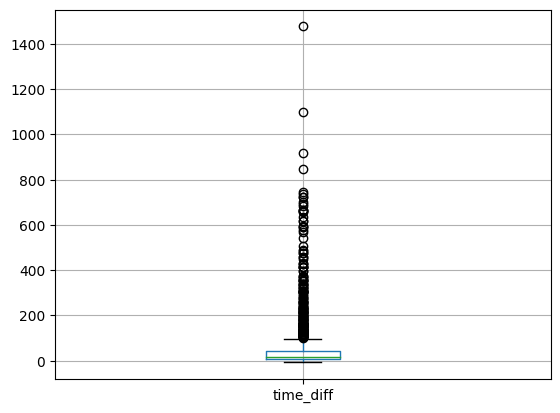

In [58]:
tt1.boxplot('time_diff')

In [59]:
q1 = tt1.time_diff.quantile(0.25)
q3 = tt1.time_diff.quantile(0.75)
iqr = q3-q1
UL = q3 + 1.5*iqr
LL = q1 - 1.5*iqr
ul_count = tt1[tt1['time_diff']>UL].shape[0]
ll_count = tt1[tt1['time_diff']<LL].shape[0]
total_count = ul_count+ll_count
total_perc = total_count*100/tt1.shape[0]
print(f'Q1: {q1} | Q3: {q3} | IQR: {iqr} | UL Count: {ul_count} | LL Count: {ll_count} | Total Outliers: {total_count} | % Outliers: {round(total_perc)}%')


Q1: 9.05 | Q3: 44.55 | IQR: 35.5 | UL Count: 219 | LL Count: 0 | Total Outliers: 219 | % Outliers: 14%


In [60]:
tt1.time_diff.describe()

count    1589.000000
mean       55.630407
std       114.717939
min        -7.700000
25%         9.050000
50%        16.950000
75%        44.550000
max      1477.183333
Name: time_diff, dtype: float64

In [61]:
tt1['time_diff'] =  pd.cut(tt1.time_diff, bins=[-8,2,18,48,1500], labels=['Urgent', 'SameDay', 'Regular', 'Advance'])

In [62]:
tt1.sample(5)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
172944,Medium,Zero,9,Thrusday,15,0,Afternoon,SameDay,0,0,0
171964,High,High,9,Friday,21,0,Evening,SameDay,1,0,1
165741,Zero,Zero,8,Saturday,0,1,Night,SameDay,0,0,0
178991,High,Medium,10,Monday,8,0,Morning,SameDay,1,0,1
142676,Medium,Medium,3,Saturday,0,1,Night,SameDay,1,0,0


# EDA

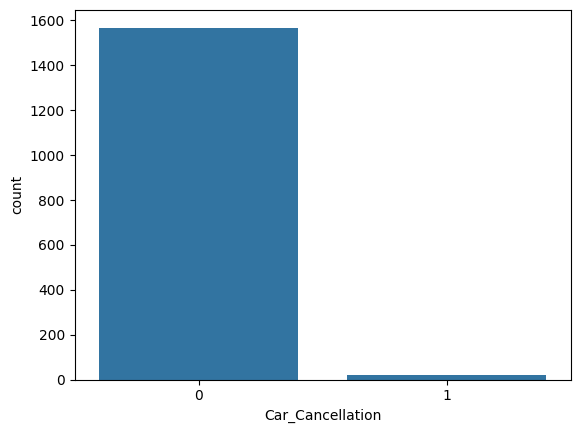

In [63]:
sns.countplot(x='Car_Cancellation', data=tt1)
plt.show()
# Analysis: almost 1% of Long distance travel is cancelled, May not be a huge differenced to buisness 
# and not useful for machine learning

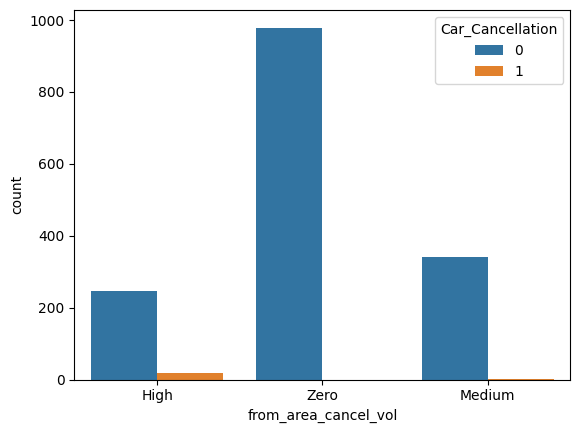

In [64]:
sns.countplot(x='from_area_cancel_vol',hue='Car_Cancellation', data=tt1)
plt.show()

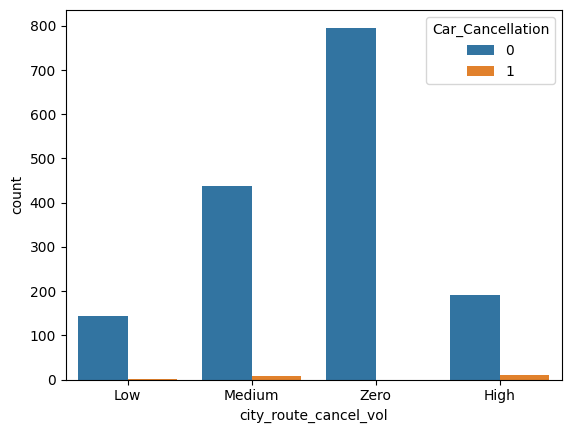

In [65]:
sns.countplot(x='city_route_cancel_vol',hue='Car_Cancellation', data=tt1)
plt.show()

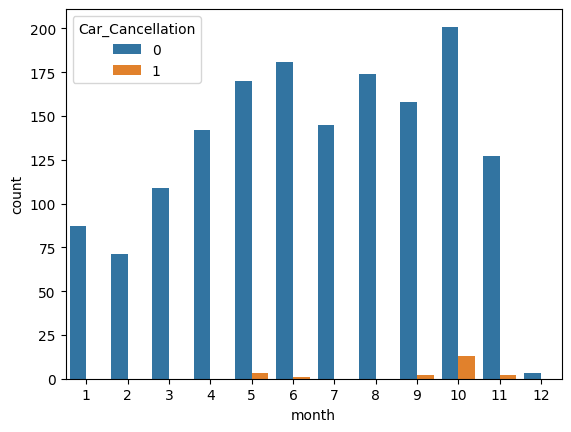

In [66]:
sns.countplot(x='month',hue='Car_Cancellation', data=tt1)
plt.show()

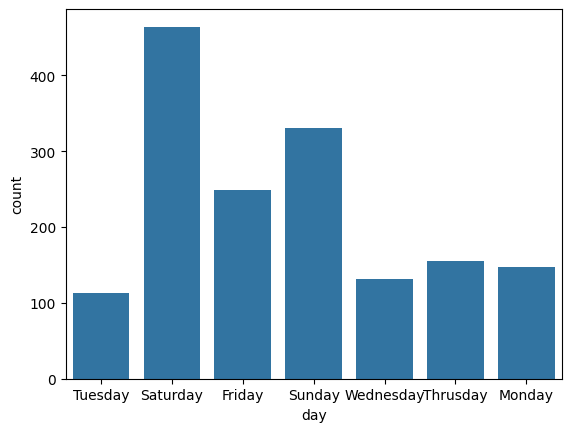

In [67]:
sns.countplot(x='day', data=tt1)
plt.show()

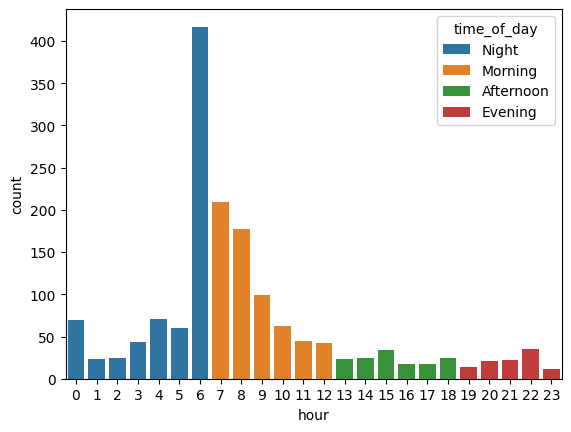

In [68]:
sns.countplot(x='hour',hue='time_of_day',data=tt1)
plt.show()

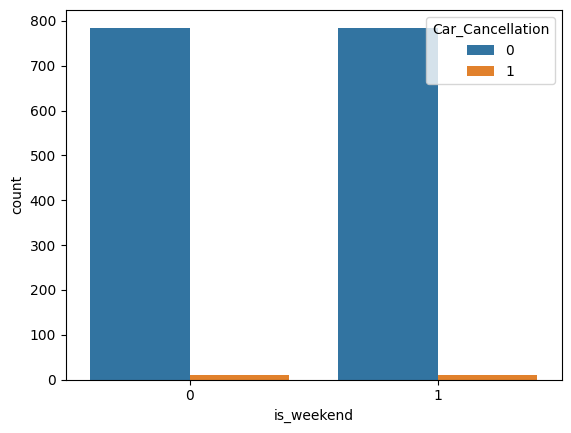

In [69]:
sns.countplot(x='is_weekend',hue='Car_Cancellation', data=tt1)
plt.show()

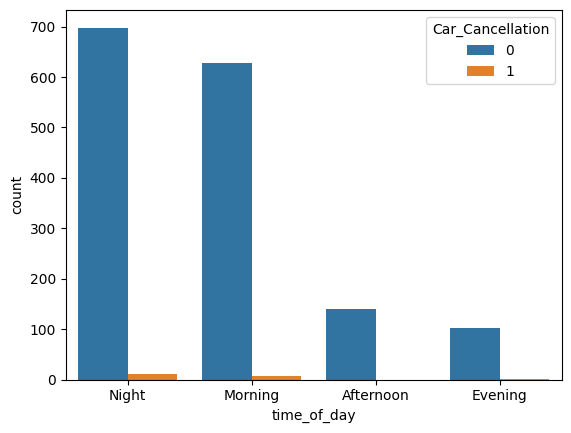

In [70]:
sns.countplot(x='time_of_day',hue='Car_Cancellation', data=tt1)
plt.show()

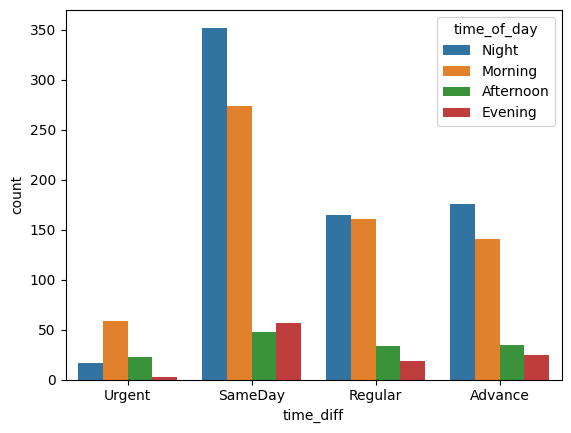

In [71]:
sns.countplot(x='time_diff',hue='time_of_day', data=tt1)
plt.show()

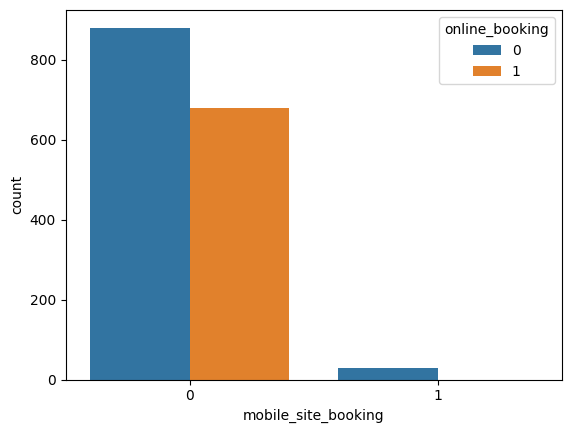

In [72]:
sns.countplot(x='mobile_site_booking',hue='online_booking', data=tt1)
plt.show()

# Label Encoding

In [73]:
tt1.sample(3)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
171016,Zero,Zero,9,Saturday,2,1,Night,Advance,0,0,0
175822,Zero,Medium,9,Saturday,7,1,Morning,SameDay,0,0,0
144894,Medium,Zero,5,Thrusday,18,0,Afternoon,Advance,1,0,0


In [74]:
tt1.from_area_cancel_vol = tt1.from_area_cancel_vol.map({'Zero':0, 'Low':1, 'Medium':2, 'High':3})
tt1.city_route_cancel_vol = tt1.city_route_cancel_vol.map({'Zero':0, 'Low':1, 'Medium':2, 'High':3})
tt1.time_of_day = tt1.time_of_day.map({'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4})
tt1.time_diff = tt1.time_diff.map({'Urgent':1, 'SameDay':2, 'Regular':3, 'Advance':4})
tt1.day = tt1.day.map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thrusday':3,'Friday':4,'Saturday':5,'Sunday':6})
tt1.head()

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132519,3,1,1,1,9,0,1,1,0,0,0
132531,0,2,1,5,8,1,1,4,1,0,0
132539,0,2,1,5,8,1,1,4,0,0,0
132697,0,0,1,4,9,0,1,3,1,0,0
132760,0,2,1,6,7,1,1,3,1,0,0


# Machine Learning

In [75]:
x = tt1.drop('Car_Cancellation', axis=1)
y=tt1['Car_Cancellation']

In [76]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=342)

## Descision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [78]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [79]:
ypred = dt.predict(xtest)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       470
           1       0.40      0.29      0.33         7

    accuracy                           0.98       477
   macro avg       0.69      0.64      0.66       477
weighted avg       0.98      0.98      0.98       477



> As we can see, because of the class imbalance the model is too biased to be productive for prediction. Hence, travel type1 is not fit machine learning

> Cancellaion data is very less comparing to non-cancellation

# Preprocessing `tt2`

In [81]:
tt2.sample(3)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
166341,2,NaN,393.0,571.0,15.0,NaN,08-12-2013 06:45,1,0,08-12-2013 05:03,13.19956,77.70688,12.95185,77.69642,0
183756,2,NaN,585.0,1120.0,15.0,NaN,11-10-2013 07:30,0,1,11-09-2013 11:05,12.97677,77.57270,12.89724,77.61065,0
160369,2,NaN,822.0,393.0,NaN,NaN,7/14/2013 14:00,1,0,7/13/2013 12:27,13.01024,77.58056,13.19956,77.70688,0


In [82]:
tt2.drop(['travel_type_id','package_id','from_city_id','to_city_id'], axis=1, inplace=True)
tt2.sample(2)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,
159467,393.0,278.0,07-09-2013 21:00,0,1,07-09-2013 09:06,13.19956,77.70688,13.00472,77.55381,0
135062,450.0,393.0,1/24/2013 6:30,0,0,1/23/2013 23:17,12.93340,77.62652,13.19956,77.70688,0


## Transform `from_area_id` and `to_area_id`

In [83]:
tt2['area_route'] = tt1.from_area_id.astype('str') + '->' + tt1.from_area_id.astype('str')

AttributeError: 'DataFrame' object has no attribute 'from_area_id'